In [110]:
from __future__ import division, print_function
%load_ext autoreload
%autoreload 2
%matplotlib
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
plt.rcParams['image.cmap'] = 'gist_earth'

from tf_unet import image_gen
from tf_unet import unet
from tf_unet import util

nx = 512
ny = 512

generator = image_gen.get_image_gen(nx, ny, cnt=80)

x_test, y_test = generator(4)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Using matplotlib backend: Qt5Agg


In [111]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(8,4))
ax[0].imshow(x_test[0,...,0], aspect="auto")
ax[1].imshow(y_test[0,...,1], aspect="auto")
print(type(x_test[0,0,0,0]))
print(type(y_test[0,0,0,0]))

<class 'numpy.float64'>
<class 'numpy.float64'>


In [103]:
net = unet.Unet(channels=generator.channels, n_class=generator.n_class, layers=3, features_root=16)

Layers 3, features 16, filter size 3x3, pool size: 2x2


In [104]:
trainer = unet.Trainer(net, optimizer="momentum", opt_kwargs=dict(momentum=0.2))

In [105]:
path = trainer.train(generator, "./unet_trained", training_iters=20, epochs=10, display_step=2)

Removing '/home/jericho/ML_medphys/tf_unet/prediction'
Removing '/home/jericho/ML_medphys/tf_unet/unet_trained'
Allocating '/home/jericho/ML_medphys/tf_unet/prediction'
Allocating '/home/jericho/ML_medphys/tf_unet/unet_trained'
Verification error= 24.8%, loss= 0.8517
Start optimization
Iter 0, Minibatch Loss= 0.8145, Training Accuracy= 0.7766, Minibatch error= 22.3%
Iter 2, Minibatch Loss= 0.8012, Training Accuracy= 0.7007, Minibatch error= 29.9%
Iter 4, Minibatch Loss= 0.7455, Training Accuracy= 0.7466, Minibatch error= 25.3%
Iter 6, Minibatch Loss= 0.7191, Training Accuracy= 0.7517, Minibatch error= 24.8%
Iter 8, Minibatch Loss= 0.7127, Training Accuracy= 0.7499, Minibatch error= 25.0%
Iter 10, Minibatch Loss= 0.7483, Training Accuracy= 0.7179, Minibatch error= 28.2%
Iter 12, Minibatch Loss= 0.6354, Training Accuracy= 0.8022, Minibatch error= 19.8%
Iter 14, Minibatch Loss= 0.6998, Training Accuracy= 0.7451, Minibatch error= 25.5%
Iter 16, Minibatch Loss= 0.7117, Training Accuracy= 0.

Iter 174, Minibatch Loss= 0.4618, Training Accuracy= 0.8922, Minibatch error= 10.8%
Iter 176, Minibatch Loss= 0.4405, Training Accuracy= 0.9092, Minibatch error= 9.1%
Iter 178, Minibatch Loss= 0.4243, Training Accuracy= 0.9458, Minibatch error= 5.4%
Epoch 8, Average loss: 0.5128, learning rate: 0.1327
Verification error= 7.0%, loss= 0.3624
Iter 180, Minibatch Loss= 0.3528, Training Accuracy= 0.9350, Minibatch error= 6.5%
Iter 182, Minibatch Loss= 0.4446, Training Accuracy= 0.8960, Minibatch error= 10.4%
Iter 184, Minibatch Loss= 0.3482, Training Accuracy= 0.9436, Minibatch error= 5.6%
Iter 186, Minibatch Loss= 0.6724, Training Accuracy= 0.8183, Minibatch error= 18.2%
Iter 188, Minibatch Loss= 0.4000, Training Accuracy= 0.9873, Minibatch error= 1.3%
Iter 190, Minibatch Loss= 0.4776, Training Accuracy= 0.8338, Minibatch error= 16.6%
Iter 192, Minibatch Loss= 0.3511, Training Accuracy= 0.9451, Minibatch error= 5.5%
Iter 194, Minibatch Loss= 0.2888, Training Accuracy= 0.9715, Minibatch err

In [106]:
prediction = net.predict("./unet_trained/model.cpkt", x_test)

INFO:tensorflow:Restoring parameters from ./unet_trained/model.cpkt
Model restored from file: ./unet_trained/model.cpkt


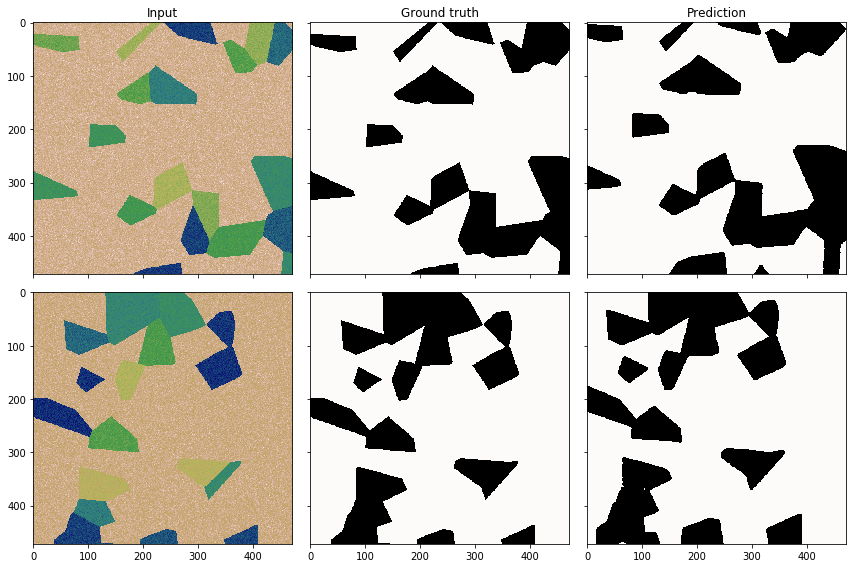

In [107]:
%matplotlib inline
fig, ax = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(12,8))
for i in range(ax.shape[0]):
    ax[i, 0].imshow(x_test[i,...,0], aspect="auto")
    ax[i, 1].imshow(y_test[i,...,1], aspect="auto")
    mask = prediction[i,...,1] > 0.9
    ax[i, 2].imshow(mask, aspect="auto")
ax[0, 0].set_title("Input")
ax[0, 1].set_title("Ground truth")
ax[0, 2].set_title("Prediction")
fig.tight_layout()
fig.savefig("docs/toy_problem.png")